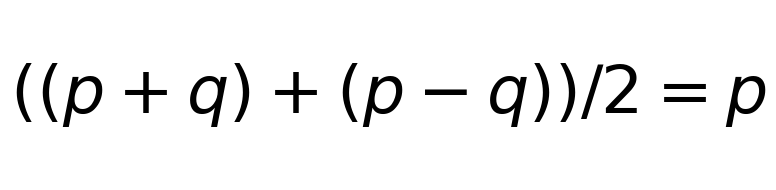

In [1]:
# EDA/EDL blueprinting for synthetic handwriting in math
import matplotlib.pyplot as plt

latex_str = r"$((p+q)+(p-q))/2=p$"

fig, ax = plt.subplots(figsize=(8, 2))
ax.text(0.5, 0.5, latex_str, fontsize=48, ha='center', va='center', fontfamily='serif')
ax.axis('off')
plt.tight_layout()
plt.savefig("synthetic_ink.png", dpi=300, bbox_inches='tight', pad_inches=0.1)
plt.show()

In [2]:
from PIL import Image, ImageDraw, ImageFont

# Example: create image with white background
img = Image.new("RGB", (800, 200), "white")
draw = ImageDraw.Draw(img)

# Example bounding box positions (naively spaced)
boxes = [(50 + i * 50, 50, 80 + i * 50, 150) for i in range(10)]

# Draw bounding boxes
for box in boxes:
    draw.rectangle(box, outline="black", width=2)

# Save and display
img.save("bounding_boxes.png")
img.show()

In [3]:
print(img)

<PIL.Image.Image image mode=RGB size=800x200 at 0x7A7044739880>


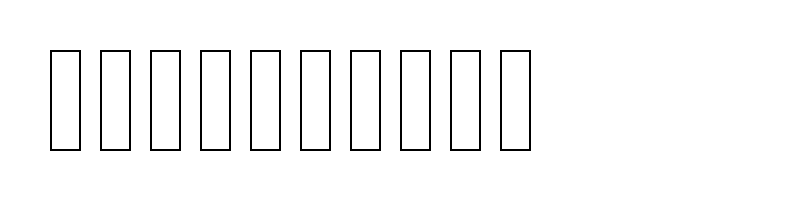

In [4]:
from IPython.display import Image

# Test png stdout for bounding boxes
Image(filename="bounding_boxes.png")

In [5]:
from PIL import Image

# Concatenate images for test runs
# Load both images
bbox_img = Image.open("bounding_boxes.png")
latex_img = Image.open("synthetic_ink.png")

# Calculate new combined image size
combined_height = bbox_img.height + latex_img.height
combined_width = max(bbox_img.width, latex_img.width)

# Create new blank image
combined_img = Image.new("RGB", (combined_width, combined_height), "white")

# Paste images
combined_img.paste(bbox_img, (0, 0))
combined_img.paste(latex_img, (0, bbox_img.height))

# Save combined
combined_img.save("combined_synthetic_ink.png")

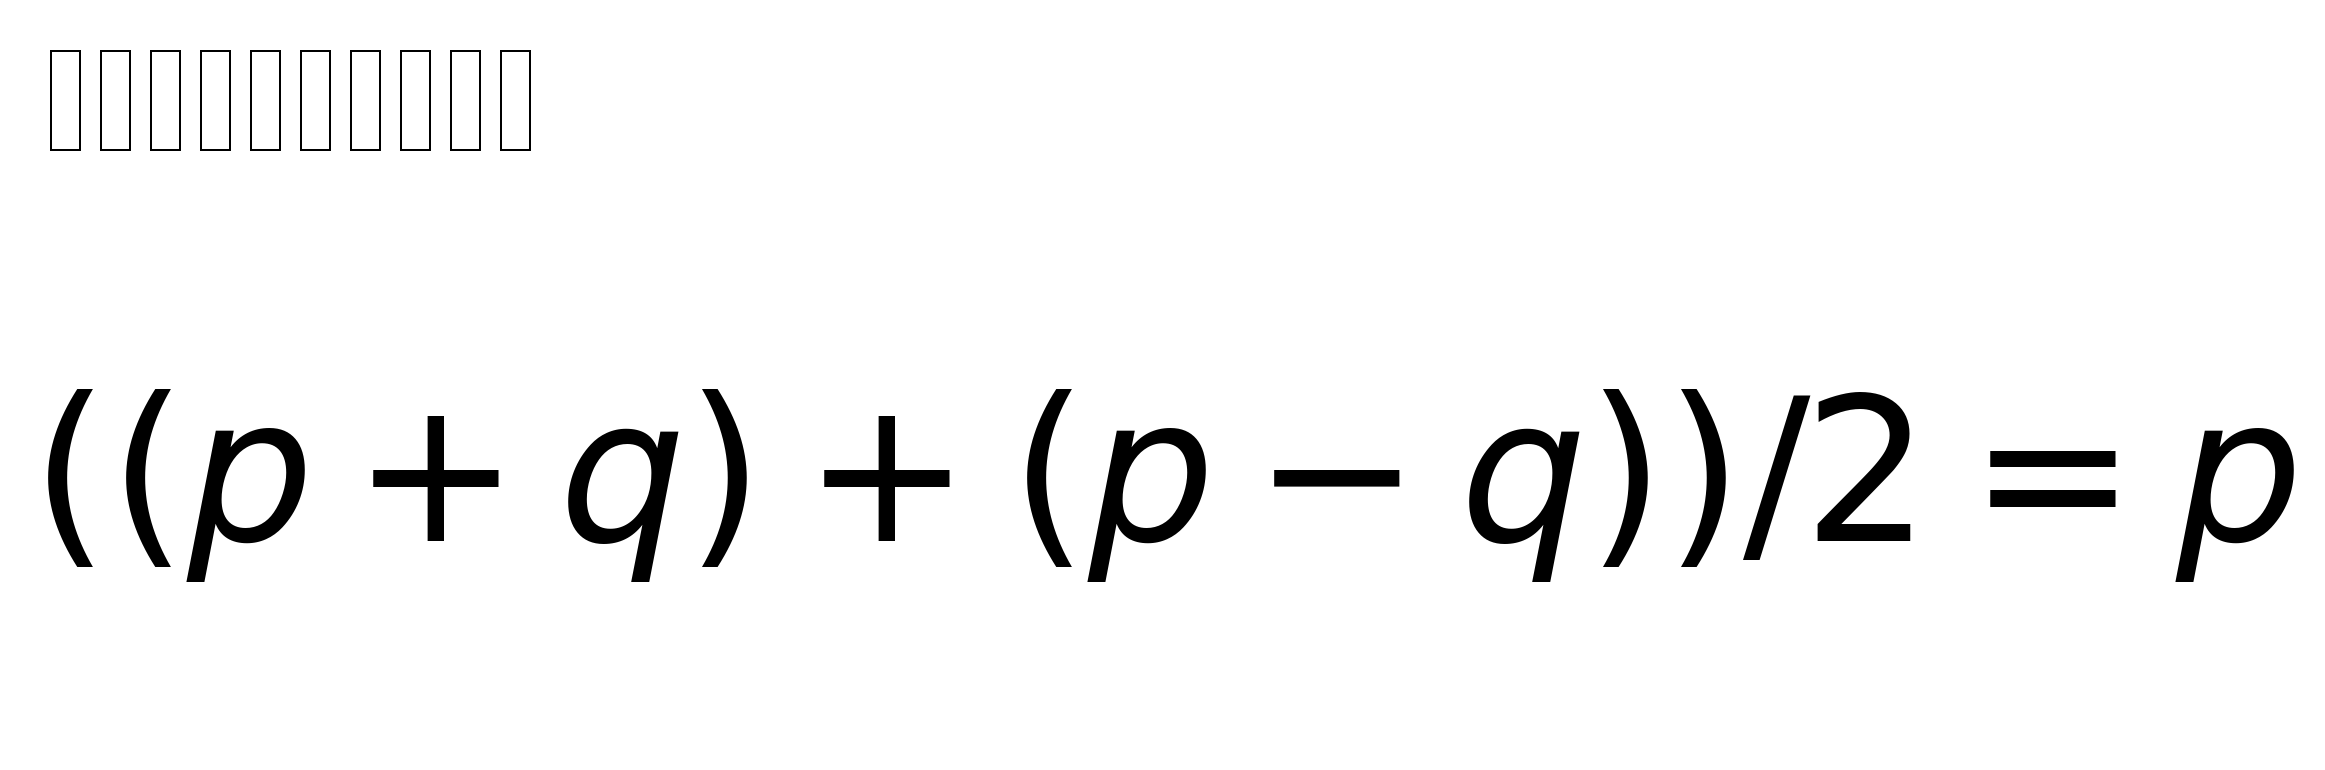

In [6]:
from IPython.display import Image

# Test png stdout
Image(filename="combined_synthetic_ink.png")

In [8]:
latex_str = r"$((p+q)+(p-q))/2=p$"

fig, ax = plt.subplots(figsize=(8, 2))
ax.text(0.5, 0.5, latex_str, fontsize=48, ha='center', va='center', fontfamily='serif')
ax.axis('off')
plt.tight_layout()
plt.savefig("formula_image.png", dpi=300, bbox_inches='tight', pad_inches=0.1)
plt.close()
print(latex_str)

$((p+q)+(p-q))/2=p$


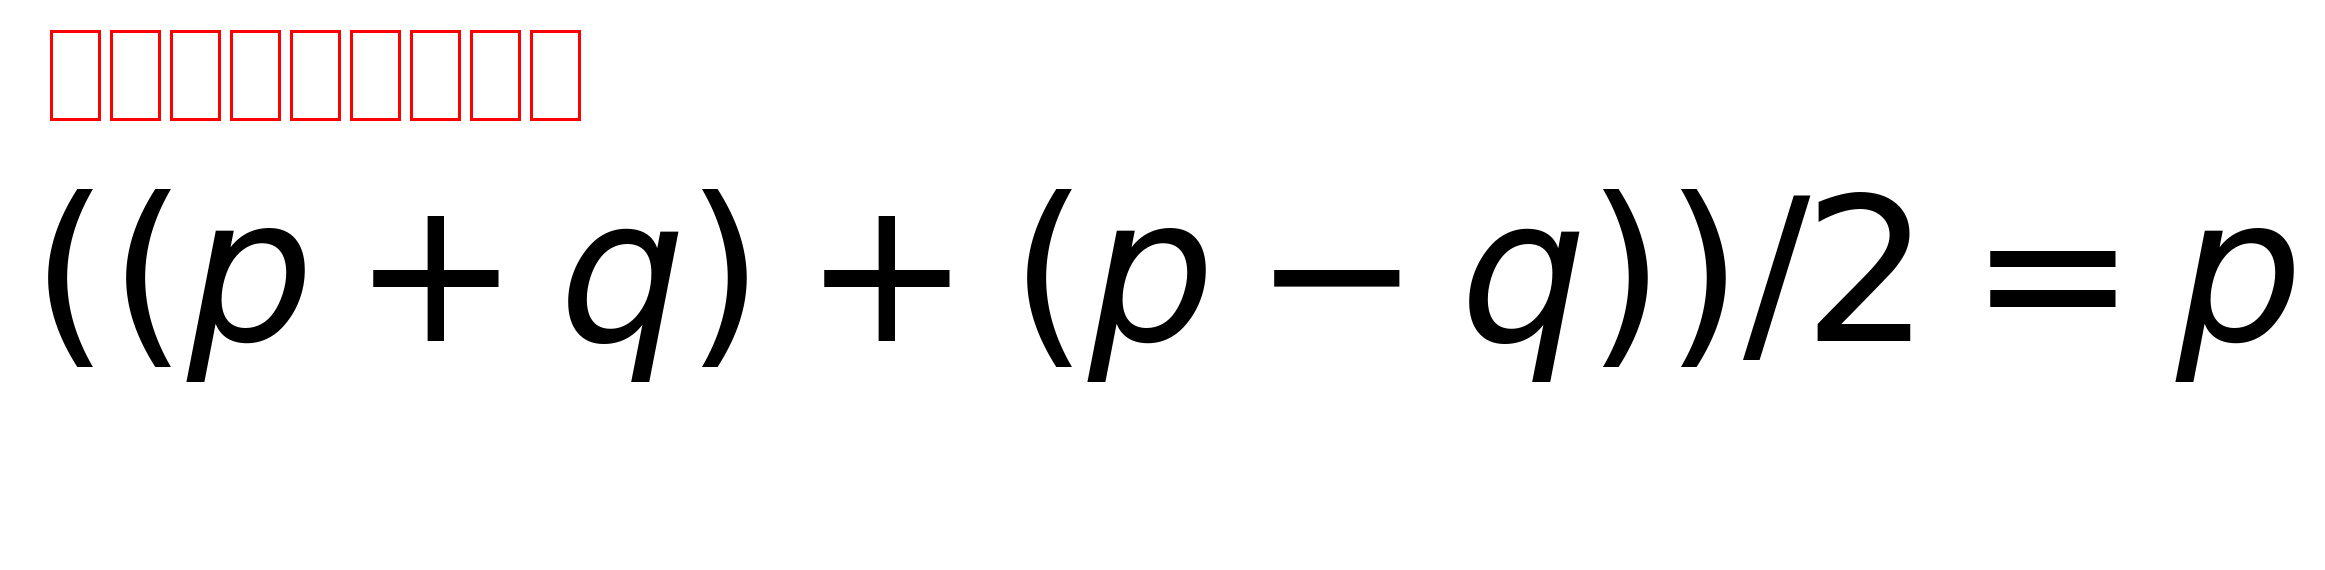

In [9]:
from PIL import Image, ImageDraw
from IPython.display import display

# Open the LaTeX-rendered image
img = Image.open("formula_image.png")
draw = ImageDraw.Draw(img)

# Example: define bounding boxes (fake approximate positions here)
# You need to fine-tune these coordinates to match characters precisely!
boxes = [
    (50, 30, 100, 120),
    (110, 30, 160, 120),
    (170, 30, 220, 120),
    (230, 30, 280, 120),
    (290, 30, 340, 120),
    (350, 30, 400, 120),
    (410, 30, 460, 120),
    (470, 30, 520, 120),
    (530, 30, 580, 120),
]

# Draw boxes
for box in boxes:
    draw.rectangle(box, outline="red", width=3)

# Save and show
img.save("formula_with_boxes.png")
display(img)

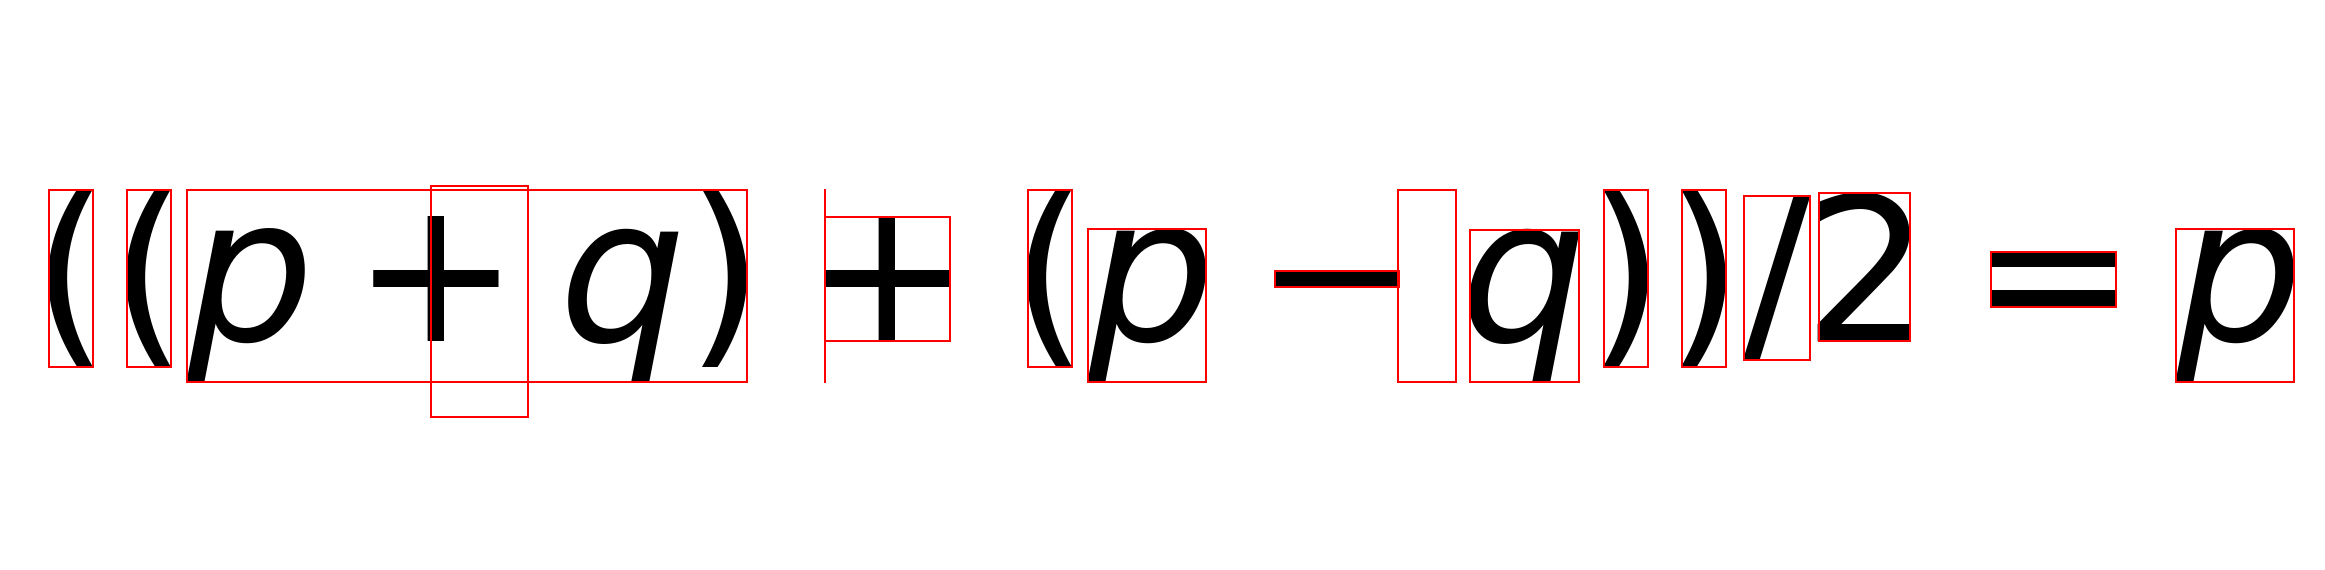

In [10]:
import pytesseract
from PIL import Image, ImageDraw
from IPython.display import display

# Load image (replace with your LaTeX-rendered image)
img = Image.open("formula_image.png")

# Run Tesseract OCR to get bounding boxes
boxes_str = pytesseract.image_to_boxes(img, config='--psm 6')

draw = ImageDraw.Draw(img)

# Draw bounding boxes
for b in boxes_str.splitlines():
    b = b.split()
    char, x1, y1, x2, y2 = b[0], int(b[1]), int(b[2]), int(b[3]), int(b[4])
    img_height = img.height  # Tesseract uses bottom-up y-axis
    draw.rectangle([x1, img_height - y2, x2, img_height - y1], outline="red", width=2)

# Save image if you want
img.save("formula_with_ocr_boxes.png")

# Display in Jupyter
display(img)

In [59]:
import pandas as pd
from pathlib import Path
from lxml import etree

inkml_dir = "/home/rc/version-cv/data/googleresearch/mathwriting-2025/train"
inkml_files = list(Path(inkml_dir).rglob("*.inkml"))

records = []

for f in inkml_files[:1000]:  # Adjust as needed
    try:
        tree = etree.parse(str(f))
        ns = {'ns': 'http://www.w3.org/2003/InkML'}
        
        label_elements = tree.xpath('//ns:annotation[@type="label"]', namespaces=ns)
        normalized_elements = tree.xpath('//ns:annotation[@type="normalizedLabel"]', namespaces=ns)

        label = None
        normalized = None

        if label_elements and label_elements[0].text:
            label = label_elements[0].text.strip()

        if normalized_elements and normalized_elements[0].text:
            normalized = normalized_elements[0].text.strip()

        if not label and not normalized:
            continue

        label_len = len(label) if label else 0
        normalized_len = len(normalized) if normalized else 0
        diff_len = normalized_len - label_len

        trace_elements = tree.xpath('//ns:trace', namespaces=ns)
        num_traces = len(trace_elements)
        total_points = 0
        points_per_trace = []

        for trace in trace_elements:
            coords = trace.text.strip().split(',')
            num_points = len(coords)
            points_per_trace.append(num_points)
            total_points += num_points

        avg_points_per_trace = sum(points_per_trace) / num_traces if num_traces > 0 else 0

        # Feature set
        records.append({
            "label": label,
            "normalizedLabel": normalized,
            "label_length": label_len,
            "normalized_length": normalized_len,
            "length_diff": diff_len,
            "num_traces": num_traces,
            "total_points": total_points,
            "avg_points_per_trace": avg_points_per_trace
        })
    except Exception as e:
        continue

df = pd.DataFrame(records)
print("DataFrame shape:", df.shape)
print(df[['label', 'normalizedLabel']].head())

DataFrame shape: (1000, 8)
                                               label  \
0                         \dot{r}=\frac{G}{2}\dot{v}   
1                            G = \int^T_0 k(t)x(t)dt   
2                        k(\omega)=n(\omega)\omega/c   
3                      \lfloor \frac{1}{2}|V|\rfloor   
4  x_{2}'=\frac {x_{2} \cdot vq_{2}}{\sqrt {7 \cd...   

                                     normalizedLabel  
0                         \dot{r}=\frac{G}{2}\dot{v}  
1                           G=\int_{0}^{T}k(t)x(t)dt  
2                        k(\omega)=n(\omega)\omega/c  
3                       \lfloor\frac{1}{2}|V|\rfloor  
4  x_{2}^{\prime}=\frac{x_{2}\cdot vq_{2}}{\sqrt{...  


In [60]:
print(df.head())

                                               label  \
0                         \dot{r}=\frac{G}{2}\dot{v}   
1                            G = \int^T_0 k(t)x(t)dt   
2                        k(\omega)=n(\omega)\omega/c   
3                      \lfloor \frac{1}{2}|V|\rfloor   
4  x_{2}'=\frac {x_{2} \cdot vq_{2}}{\sqrt {7 \cd...   

                                     normalizedLabel  label_length  \
0                         \dot{r}=\frac{G}{2}\dot{v}            26   
1                           G=\int_{0}^{T}k(t)x(t)dt            23   
2                        k(\omega)=n(\omega)\omega/c            27   
3                       \lfloor\frac{1}{2}|V|\rfloor            29   
4  x_{2}^{\prime}=\frac{x_{2}\cdot vq_{2}}{\sqrt{...            69   

   normalized_length  length_diff  num_traces  total_points  \
0                 26            0          10           344   
1                 24            1          22           474   
2                 27            0          15        

In [39]:
# Running into dependency fragmentation.
# Checking env.
#!python --version

Python 3.12.11


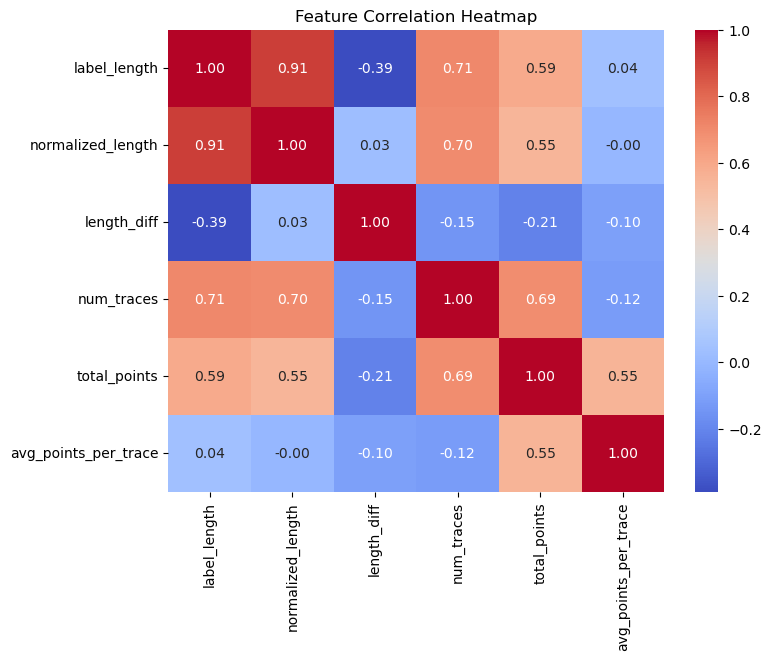

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns
numeric_df = df.select_dtypes(include='number')

# Compute correlation
corr = numeric_df.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

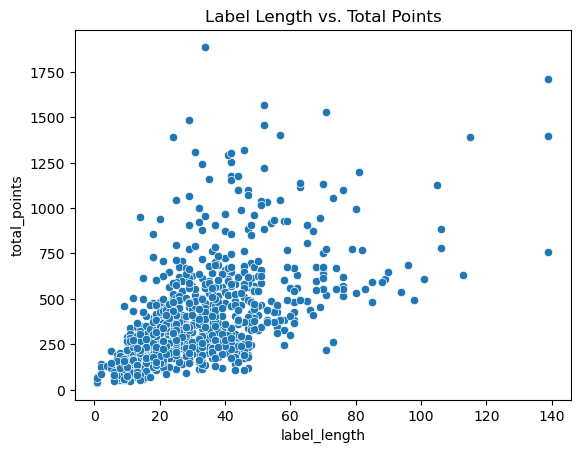

In [42]:
sns.scatterplot(data=df, x="label_length", y="total_points")
plt.title("Label Length vs. Total Points")
plt.show()

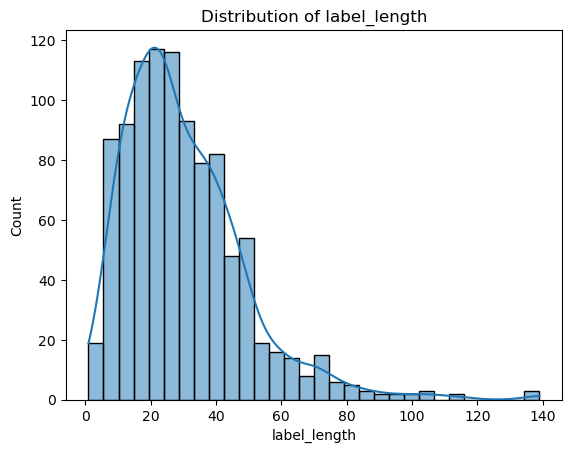

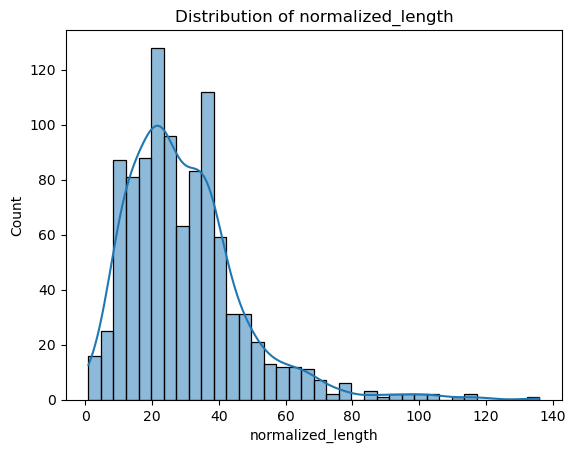

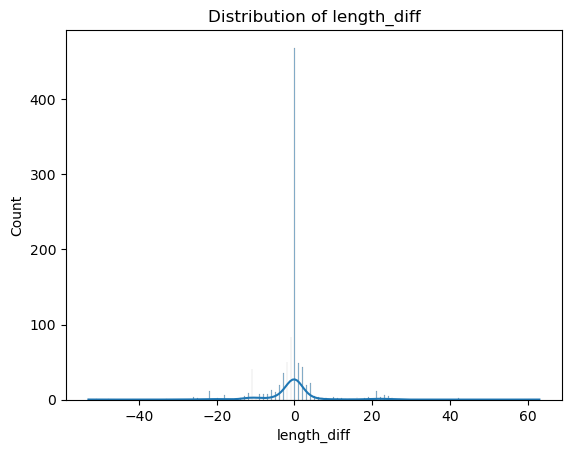

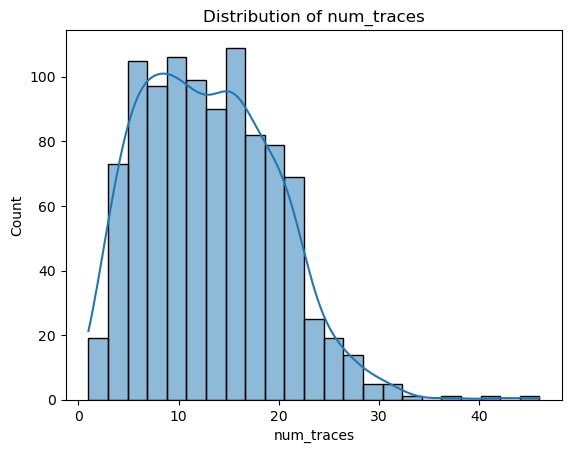

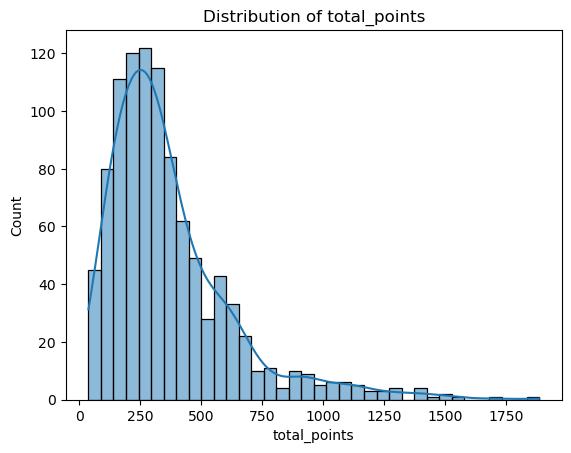

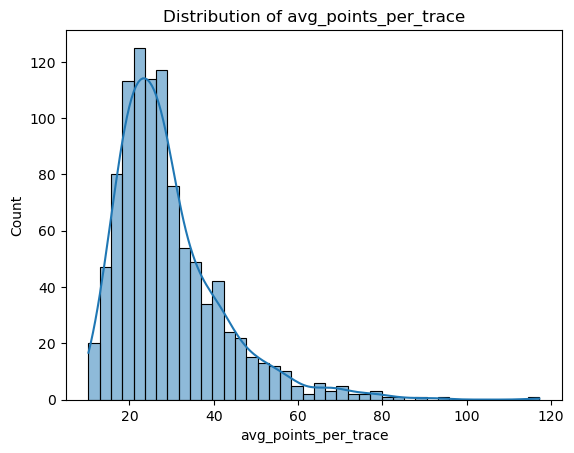

In [43]:
for col in df.columns:
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()

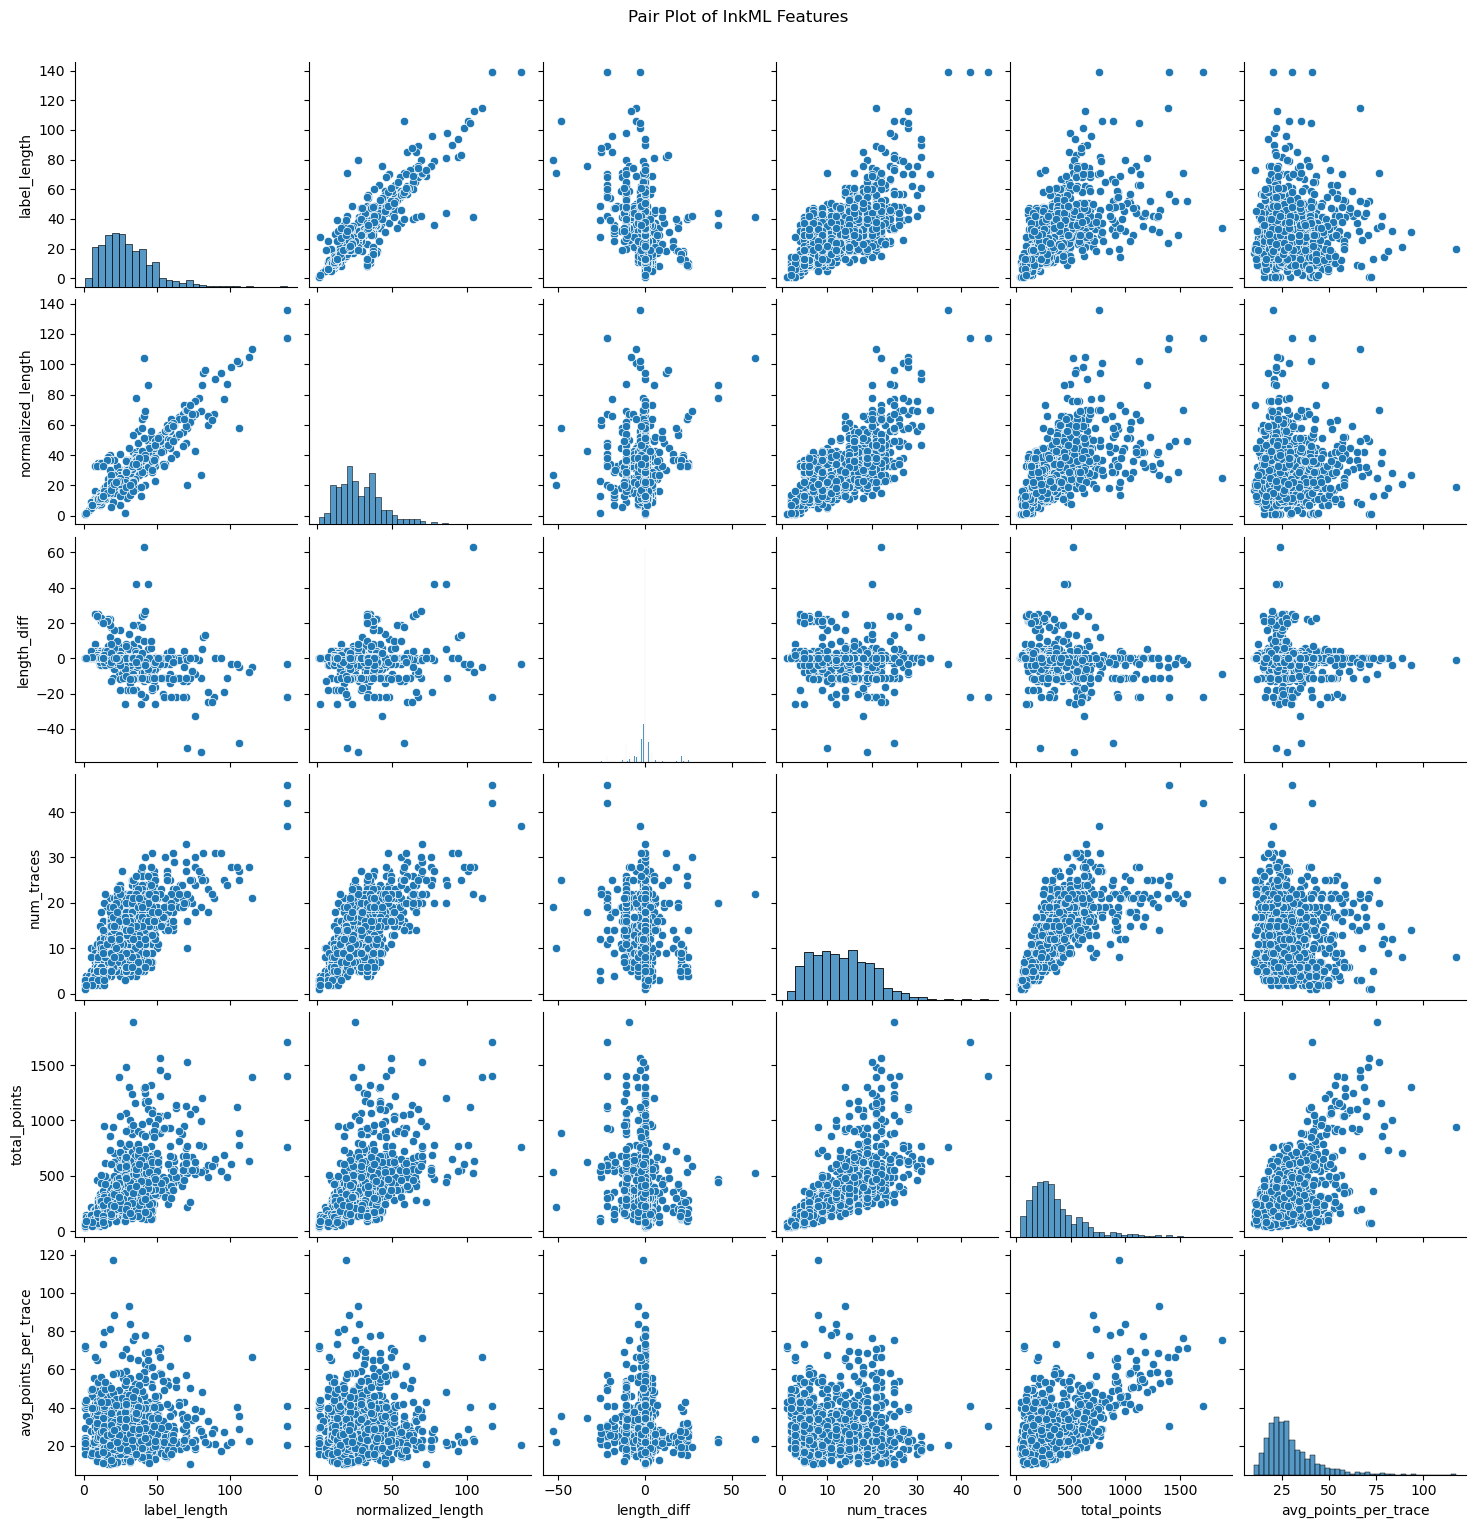

In [44]:
sns.pairplot(df)
plt.suptitle("Pair Plot of InkML Features", y=1.02)
plt.show()

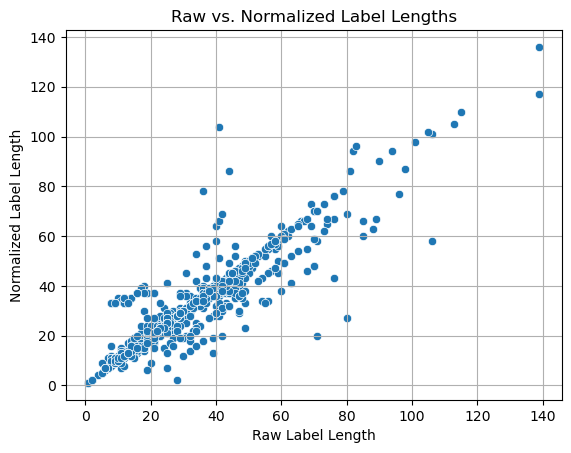

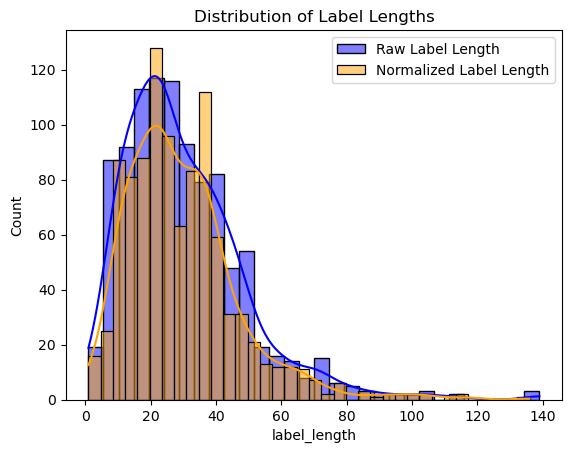

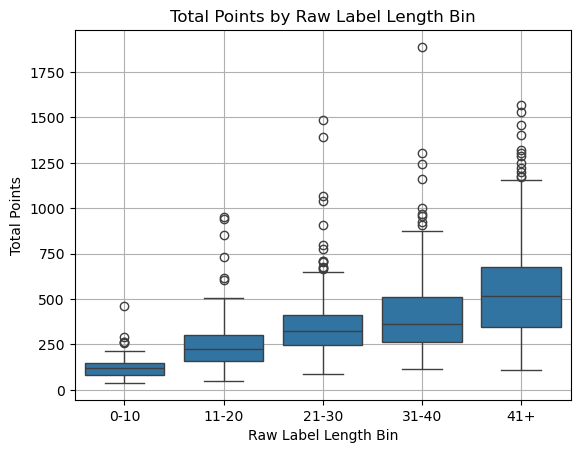

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot: raw vs normalized label lengths
sns.scatterplot(x="label_length", y="normalized_length", data=df)
plt.title("Raw vs. Normalized Label Lengths")
plt.xlabel("Raw Label Length")
plt.ylabel("Normalized Label Length")
plt.grid(True)
plt.show()

# Distribution of raw and normalized label lengths
sns.histplot(df["label_length"], color="blue", label="Raw Label Length", kde=True)
sns.histplot(df["normalized_length"], color="orange", label="Normalized Label Length", kde=True)
plt.title("Distribution of Label Lengths")
plt.legend()
plt.show()

# Boxplot: total points by raw label length bins
df["length_bin"] = pd.cut(df["label_length"], bins=[0, 10, 20, 30, 40, 100], labels=["0-10", "11-20", "21-30", "31-40", "41+"])

sns.boxplot(x="length_bin", y="total_points", data=df)
plt.title("Total Points by Raw Label Length Bin")
plt.xlabel("Raw Label Length Bin")
plt.ylabel("Total Points")
plt.grid(True)
plt.show()

# Clean up temporary bin column
df.drop(columns=["length_bin"], inplace=True)

In [63]:
print(df.columns)

Index(['label', 'normalizedLabel', 'label_length', 'normalized_length',
       'length_diff', 'num_traces', 'total_points', 'avg_points_per_trace'],
      dtype='object')


In [64]:
print(df[['label', 'normalizedLabel']].head(10))

                                               label  \
0                         \dot{r}=\frac{G}{2}\dot{v}   
1                            G = \int^T_0 k(t)x(t)dt   
2                        k(\omega)=n(\omega)\omega/c   
3                      \lfloor \frac{1}{2}|V|\rfloor   
4  x_{2}'=\frac {x_{2} \cdot vq_{2}}{\sqrt {7 \cd...   
5                                    \underline{x}_0   
6         T_{L}=\frac{|C|^{2}}{|A|^{2}}=|S_{21}|^{2}   
7  lim_{k\rightarrow\infty}\frac{\lambda_{k}}{\la...   
8        \begin{pmatrix}a & b \\ c & d \end{pmatrix}   
9                        \{I[u_{k}]\}_{k=1}^{\infty}   

                                     normalizedLabel  
0                         \dot{r}=\frac{G}{2}\dot{v}  
1                           G=\int_{0}^{T}k(t)x(t)dt  
2                        k(\omega)=n(\omega)\omega/c  
3                       \lfloor\frac{1}{2}|V|\rfloor  
4  x_{2}^{\prime}=\frac{x_{2}\cdot vq_{2}}{\sqrt{...  
5                                  \underline{x}_{0} 

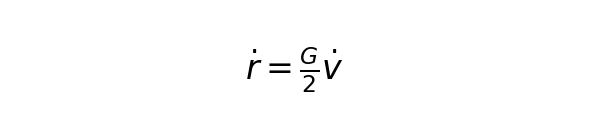

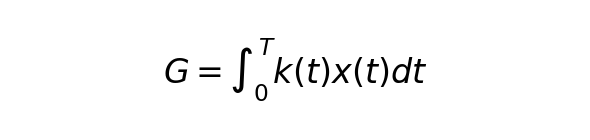

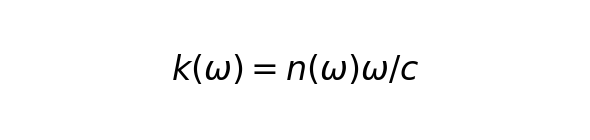

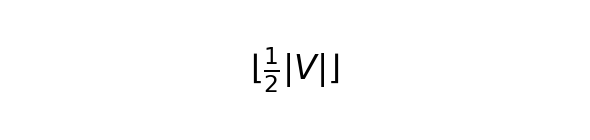

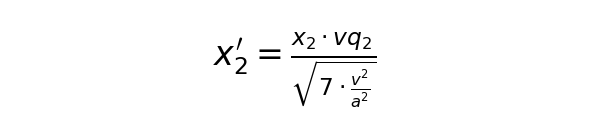

In [65]:
import matplotlib.pyplot as plt
from IPython.display import display
import pandas as pd

# Test pass on first 5 rows
for idx, row in df.head(5).iterrows():
    latex_str = row["normalizedLabel"] if pd.notna(row["normalizedLabel"]) else row["label"]
    
    if pd.isna(latex_str) or not latex_str:
        print(f"Row {idx} has no label.")
        continue

    if not (latex_str.startswith("$") and latex_str.endswith("$")):
        latex_str = f"${latex_str}$"
    
    fig, ax = plt.subplots(figsize=(6, 1.5))
    ax.text(0.5, 0.5, latex_str, fontsize=24, ha='center', va='center')
    ax.axis('off')
    plt.tight_layout()

    display(fig)
    plt.close(fig)

In [ ]:
from ydata_profiling import ProfileReport

profile = ProfileReport(df, title="MathWriting .inkml EDA", explorative=True)

# Save eda report
profile.to_file("mathwriting_inkml_report.html")

# stdout
profile.to_notebook_iframe()

In [ ]:
# Conclusion. Very granular and technical. But fun and interesting. Is buildable.
# Rigorous R&D is needed. Math is a very rigorous subject domain.

In [ ]:
# end of eda/edl feasibility test runs